# EDA and Time-Series Analysis
7.9.19, 7.10.19

In [1]:
# Import the things

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb

import numpy as np
import pandas as pd

In [2]:
# Import NLTK
from collections import Counter
import re
import string
import nltk
import requests

In [4]:
df = pd.read_csv('csv_business.csv')
df.head()

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars,state
0,2818 E Camino Acequia Drive,{'GoodForKids': 'False'},1SWheh84yJXfytovILXOAQ,"Golf, Active Life",Phoenix,NaN,0,33.522143,-112.018481,Arizona Biltmore Golf Club,85016,5,3.0,AZ
1,30 Eglinton Avenue W,"{'RestaurantsReservations': 'True', 'GoodForMe...",QXAEGFB4oINsVuTFxEYKFQ,"Specialty Food, Restaurants, Dim Sum, Imported...",Mississauga,"{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W...",1,43.605499,-79.652289,Emerald Chinese Restaurant,L5R 3E7,128,2.5,ON
2,"10110 Johnston Rd, Ste 15","{'GoodForKids': 'True', 'NoiseLevel': ""u'avera...",gnKjwL_1w79qoiV3IC_xQQ,"Sushi Bars, Restaurants, Japanese",Charlotte,"{'Monday': '17:30-21:30', 'Wednesday': '17:30-...",1,35.092564,-80.859132,Musashi Japanese Restaurant,28210,170,4.0,NC
3,"15655 W Roosevelt St, Ste 237",NaN,xvX2CttrVhyG2z1dFg_0xw,"Insurance, Financial Services",Goodyear,"{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ...",1,33.455613,-112.395596,Farmers Insurance - Paul Lorenz,85338,3,5.0,AZ
4,"4209 Stuart Andrew Blvd, Ste F","{'BusinessAcceptsBitcoin': 'False', 'ByAppoint...",HhyxOkGAM07SRYtlQ4wMFQ,"Plumbing, Shopping, Local Services, Home Servi...",Charlotte,"{'Monday': '7:0-23:0', 'Tuesday': '7:0-23:0', ...",1,35.190012,-80.887223,Queen City Plumbing,28217,4,4.0,NC


In [5]:
df.columns

Index(['address', 'attributes', 'business_id', 'categories', 'city', 'hours',
       'is_open', 'latitude', 'longitude', 'name', 'postal_code',
       'review_count', 'stars', 'state'],
      dtype='object')

In [6]:
df.shape

(192609, 14)

In [7]:
df2 = pd.read_csv('csv_businesses_nlv.csv')
df2.head()

,Unnamed: 0,attributes,business_id,categories,city,latitude,longitude,name,review_count,stars
0,0,{'BusinessAcceptsCreditCards': 'True'},lxnuq9wJiwLOPJ4uZU2ljg,"Automotive, Car Dealers",North Las Vegas,36.225852,-115.132800,Las Vegas Motorcars,3,3.5
1,1,"{'BikeParking': 'True', 'RestaurantsPriceRange...",zTIna6imZC9Ij5JWgHL9jw,"Hair Salons, Hair Stylists, Beauty & Spas",North Las Vegas,36.264034,-115.179273,Hair Design By Mary Ann,23,4.0
2,2,"{'ByAppointmentOnly': 'False', 'BusinessAccept...",tMwX4n8o4xh5hN0FWKIJ4g,"Landscape Architects, Nurseries & Gardening, H...",North Las Vegas,36.262563,-115.177158,Star Nursery,48,3.0
3,3,{'BusinessAcceptsCreditCards': 'True'},lrYB3RSnr8OVrrqHhGMwPA,"Specialty Food, Imported Food, Ethnic Food, Food",North Las Vegas,36.196168,-115.110886,Sinaloa Tacos 2,3,1.5
4,4,{'BusinessAcceptsCreditCards': 'True'},ripszTzwIaQxa0ySLOhV_g,"Local Services, Appliances & Repair",North Las Vegas,36.226434,-115.198226,Husky Services LLC,8,2.5


In [8]:
df2.shape

(1312, 10)

In [ ]:
df2['categories'] == 'pizza'

In [ ]:
df3 = pd.read_csv('csv_business2.csv')
df3.head()

In [ ]:
df3.shape

In [34]:
reviews = df4['text'].tolist()
reviews

['Had the Tonkotsu ramen for lunch upon the recommendation from a co-worker. Very well made, with a tasty broth. The slices of pork just melted in my mouth. Very filling and tasty. Have returned to try out some of the other soups!\nUpdate: The vegetable udon noodle soup was also very good. The ambience and decor need some work, but the service is very courteous and the soups are great.',
 'Service was quick, food was excellent am glad my wife and daughter saw this place and read the reviews before we went to the cannery buffet',
 "I actually think that the place is a 3.5, so, I am rounding it up! I ordered the tonkotsu ramen anddd it was okay. Would I order it again? ehh, maybee. The boba tea wasn't very good, at first I thought it was okay but as I kept drinking it the taste just got a bit funky, probably wouldn't order it again. My sister got the curry chicken katsu, NOW THAT was delicious! highly recommend that one if you are going to Tokyo Cafe. Would I come back?  I think so. I li

## 1. Formulate your questions

What does the data look like? 

## 2. Load in the Data

In [11]:
df4 = pd.read_csv('csv_review_nlv.csv')
df4.head()

,text,date,cool,funny,stars,business_id,useful,user_id,review_id
0,Had the Tonkotsu ramen for lunch upon the reco...,2017-05-02 20:37:33 UTC,0,0,4,-DnaKAs2oK3rXfrjSvn9ew,0,70p7ZC7JNkAn4YHJL2oLqQ,SvrM4R0Sn1085JldYArCwA
1,"Service was quick, food was excellent am glad ...",2015-10-09 01:30:39 UTC,0,0,5,-DnaKAs2oK3rXfrjSvn9ew,0,vRhxHrWwHpPDbzzKsCKIQw,6p-MEBAuZ4dhOA1k24vgdw
2,"I actually think that the place is a 3.5, so, ...",2015-06-07 00:33:50 UTC,0,0,4,-DnaKAs2oK3rXfrjSvn9ew,0,Bxf1jhd66YvcI0GFTIh3yQ,5P--fn1aEuuzsRiIgRcfCA
3,I eat alot of ramen and alot of curry.. but i ...,2017-07-22 20:35:05 UTC,0,0,5,-DnaKAs2oK3rXfrjSvn9ew,0,eRwwZ7CjgDuywdNZ_mtgKQ,XJLHswUbJYbzj9CmHpIsSw
4,Stopped in on a whim with my husband. Our stom...,2016-01-03 02:22:19 UTC,0,0,5,-DnaKAs2oK3rXfrjSvn9ew,0,PBSkpQxdUzx-4LyvEgX1KQ,FieX2hOMO2R0z5hj59sXCg


## 3. Check the packaging

In [12]:
df4.shape

(45606, 9)

In [16]:
df4.columns

Index(['text', 'date', 'cool', 'funny', 'stars', 'business_id', 'useful',
       'user_id', 'review_id'],
      dtype='object')

## 4. Look at the Top and Bottom of the Data

In [14]:
df4.head()

,text,date,cool,funny,stars,business_id,useful,user_id,review_id
0,Had the Tonkotsu ramen for lunch upon the reco...,2017-05-02 20:37:33 UTC,0,0,4,-DnaKAs2oK3rXfrjSvn9ew,0,70p7ZC7JNkAn4YHJL2oLqQ,SvrM4R0Sn1085JldYArCwA
1,"Service was quick, food was excellent am glad ...",2015-10-09 01:30:39 UTC,0,0,5,-DnaKAs2oK3rXfrjSvn9ew,0,vRhxHrWwHpPDbzzKsCKIQw,6p-MEBAuZ4dhOA1k24vgdw
2,"I actually think that the place is a 3.5, so, ...",2015-06-07 00:33:50 UTC,0,0,4,-DnaKAs2oK3rXfrjSvn9ew,0,Bxf1jhd66YvcI0GFTIh3yQ,5P--fn1aEuuzsRiIgRcfCA
3,I eat alot of ramen and alot of curry.. but i ...,2017-07-22 20:35:05 UTC,0,0,5,-DnaKAs2oK3rXfrjSvn9ew,0,eRwwZ7CjgDuywdNZ_mtgKQ,XJLHswUbJYbzj9CmHpIsSw
4,Stopped in on a whim with my husband. Our stom...,2016-01-03 02:22:19 UTC,0,0,5,-DnaKAs2oK3rXfrjSvn9ew,0,PBSkpQxdUzx-4LyvEgX1KQ,FieX2hOMO2R0z5hj59sXCg


In [15]:
df4.tail()

,text,date,cool,funny,stars,business_id,useful,user_id,review_id
45601,I have been by Reef Dispensaries several times...,2017-12-06 14:30:43 UTC,57,39,3,fiTbSTsONukX-oB9fXawEg,67,Fv0e9RIV9jw5TX3ctA1WbA,jxZprEJQM7hxWn28-nSb_Q
45602,One of the worst DT locations. They've been op...,2017-06-25 01:45:38 UTC,52,39,1,NqYttaW7CjJjhCN3Q1n-aQ,68,Fv0e9RIV9jw5TX3ctA1WbA,iwk9k0iAnJzxMj62ZB_BBg
45603,Thrive located in Las Vegas NV. \n \nThe Cheye...,2018-01-07 02:53:39 UTC,69,38,5,yeiS_cpJyxMYuYtBPxkYyA,73,kl_yCsj4ESbUphmpCfVvRA,tdCrNrGmPR_pZrhddys_sA
45604,Donut Mania has new co-owners and has now open...,2017-10-24 15:24:26 UTC,60,51,1,DRu7tyKLgvN_7c1tdZq5rA,77,Fv0e9RIV9jw5TX3ctA1WbA,ZEUK_exaRd77R1xaWah6vQ
45605,"Made my order and the friendly Cane'nette, gav...",2015-11-30 20:34:39 UTC,87,72,4,hQ8JN52MjxbMUPfuhyL7jQ,92,EZmocAborM6z66rTzeZxzQ,lkW-hoHVG0qNj3sZ7QmY7A


## 5. Check the "n's"

Stars should only go from 1-5 

In [22]:
df4['stars'].value_counts()

5    21458
1    10646
4     6815
3     3487
2     3200
Name: stars, dtype: int64

Check the dates of the CSV -- see if they are in any order (they probably aren't because c'est la vie) 

In [27]:
df4['date'].head()

0    2017-05-02 20:37:33 UTC
1    2015-10-09 01:30:39 UTC
2    2015-06-07 00:33:50 UTC
3    2017-07-22 20:35:05 UTC
4    2016-01-03 02:22:19 UTC
Name: date, dtype: object

In [28]:
df4['date'].tail()

45601    2017-12-06 14:30:43 UTC
45602    2017-06-25 01:45:38 UTC
45603    2018-01-07 02:53:39 UTC
45604    2017-10-24 15:24:26 UTC
45605    2015-11-30 20:34:39 UTC
Name: date, dtype: object

Look at the 'Cool' column 

In [63]:
df4['cool'].value_counts()

0     35678
1      6258
2      1766
3       648
4       361
5       224
6       146
7       110
9        72
8        70
10       51
11       36
12       20
13       18
15       17
14       16
17        9
16        8
18        8
19        5
35        5
25        5
20        5
32        5
43        4
49        3
57        3
53        3
60        3
22        3
36        3
27        3
39        3
34        2
30        2
28        2
58        2
26        2
23        2
45        2
31        2
52        2
48        2
55        2
21        1
62        1
33        1
50        1
29        1
41        1
40        1
37        1
69        1
44        1
38        1
87        1
24        1
54        1
63        1
Name: cool, dtype: int64

So the highest number of "cool's" a review got was 63, but the majority was 0 

Look at the 'Funny' column 

In [30]:
df4['funny'].value_counts()

0     37238
1      4882
2      1588
3       656
4       378
5       221
6       180
7       107
8        77
9        60
10       43
11       27
12       16
14       15
13       14
15       13
25        6
39        5
17        5
28        5
29        4
16        4
40        4
18        4
35        4
26        4
41        4
24        3
21        3
19        3
36        2
23        2
34        2
33        2
38        2
27        2
31        2
20        2
51        2
30        2
45        2
48        2
22        1
37        1
42        1
43        1
44        1
66        1
46        1
47        1
72        1
Name: funny, dtype: int64

So the highest number of "funny's" a review got was 72, but the majority was also 0 

See what's up with the "useful" column -- see if it's actually living up to its name 

In [31]:
df4['useful'].value_counts()

0     25971
1      9395
2      4071
3      2058
4      1213
5       779
6       548
7       336
8       232
9       192
10      142
11      110
12       94
13       66
14       51
15       42
16       31
17       26
19       22
20       20
18       19
22       17
25       16
21       13
24       10
23        9
43        8
35        6
39        6
37        5
      ...  
27        4
41        4
33        4
57        4
31        4
44        4
46        4
42        3
62        3
32        3
61        3
55        3
40        2
34        2
48        2
28        2
49        2
54        2
36        2
53        2
50        2
73        1
77        1
67        1
51        1
59        1
92        1
68        1
58        1
60        1
Name: useful, Length: 66, dtype: int64

See if there is any correlation between stars and cool and funny 

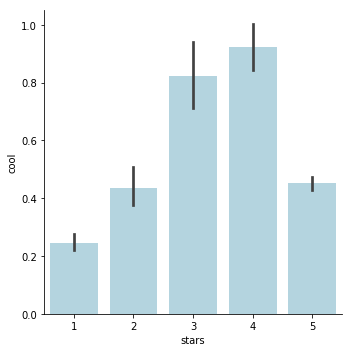

In [48]:
sb.catplot(x='stars',y='cool',data=df4,kind='bar',color='lightblue')

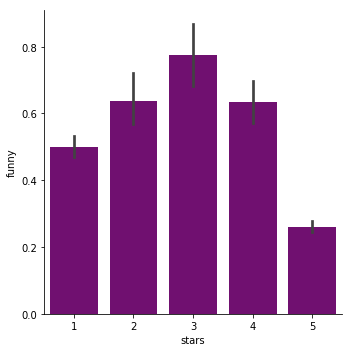

In [49]:
sb.catplot(x='stars',y='funny',data=df4,kind='bar',color='purple')

See if there's any correlation between stars and useful 

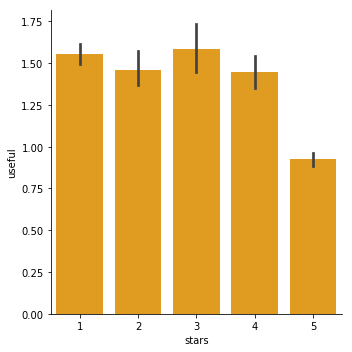

In [50]:
sb.catplot(x='stars',y='useful',data=df4,kind='bar',color='orange')

## 6. Validate against an external source (check with other csv)

## 7. Make a plot (or multiple) 

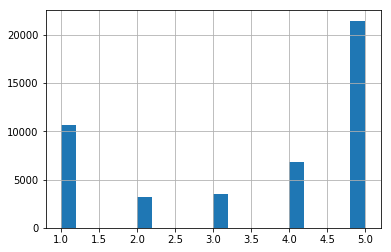

In [40]:
df4['stars'].hist(bins=20)

In [61]:
# Majority of the ratings are 5 stars and the least amount of ratings are 2 stars 

df4['stars'].value_counts()

5    21458
1    10646
4     6815
3     3487
2     3200
Name: stars, dtype: int64

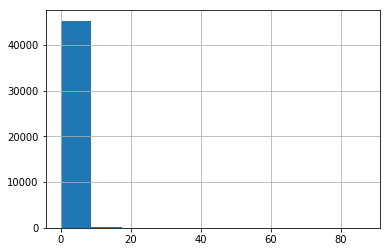

In [42]:
df4['cool'].hist()

Interesting that there's a long tail

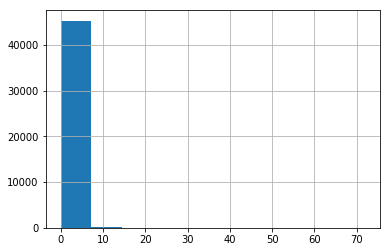

In [43]:
df4['funny'].hist()

## 8. Try an easy solution 

## 9. Do whatevs lmao tf 

Try a Smf.ols thing lol 

In [52]:
# Import more things! 
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [ ]:
m0 = smf.ols('date ~ text',data=df4).fit()
m0.summary()

Re-load dataset but parsed by date

In [26]:
nlv_time = pd.read_csv('csv_review_nlv.csv',parse_dates=['date'])

nlv_time.head()

,text,date,cool,funny,stars,business_id,useful,user_id,review_id
0,Had the Tonkotsu ramen for lunch upon the reco...,2017-05-02 20:37:33+00:00,0,0,4,-DnaKAs2oK3rXfrjSvn9ew,0,70p7ZC7JNkAn4YHJL2oLqQ,SvrM4R0Sn1085JldYArCwA
1,"Service was quick, food was excellent am glad ...",2015-10-09 01:30:39+00:00,0,0,5,-DnaKAs2oK3rXfrjSvn9ew,0,vRhxHrWwHpPDbzzKsCKIQw,6p-MEBAuZ4dhOA1k24vgdw
2,"I actually think that the place is a 3.5, so, ...",2015-06-07 00:33:50+00:00,0,0,4,-DnaKAs2oK3rXfrjSvn9ew,0,Bxf1jhd66YvcI0GFTIh3yQ,5P--fn1aEuuzsRiIgRcfCA
3,I eat alot of ramen and alot of curry.. but i ...,2017-07-22 20:35:05+00:00,0,0,5,-DnaKAs2oK3rXfrjSvn9ew,0,eRwwZ7CjgDuywdNZ_mtgKQ,XJLHswUbJYbzj9CmHpIsSw
4,Stopped in on a whim with my husband. Our stom...,2016-01-03 02:22:19+00:00,0,0,5,-DnaKAs2oK3rXfrjSvn9ew,0,PBSkpQxdUzx-4LyvEgX1KQ,FieX2hOMO2R0z5hj59sXCg


Make a new column of all the cool, funny and useful votes

In [57]:
nlv_time['total_count'] = nlv_time[['cool','funny','useful']].sum(axis=1)

nlv_time.tail()

,text,date,cool,funny,stars,business_id,useful,user_id,review_id,total_count
45601,I have been by Reef Dispensaries several times...,2017-12-06 14:30:43+00:00,57,39,3,fiTbSTsONukX-oB9fXawEg,67,Fv0e9RIV9jw5TX3ctA1WbA,jxZprEJQM7hxWn28-nSb_Q,163
45602,One of the worst DT locations. They've been op...,2017-06-25 01:45:38+00:00,52,39,1,NqYttaW7CjJjhCN3Q1n-aQ,68,Fv0e9RIV9jw5TX3ctA1WbA,iwk9k0iAnJzxMj62ZB_BBg,159
45603,Thrive located in Las Vegas NV. \n \nThe Cheye...,2018-01-07 02:53:39+00:00,69,38,5,yeiS_cpJyxMYuYtBPxkYyA,73,kl_yCsj4ESbUphmpCfVvRA,tdCrNrGmPR_pZrhddys_sA,180
45604,Donut Mania has new co-owners and has now open...,2017-10-24 15:24:26+00:00,60,51,1,DRu7tyKLgvN_7c1tdZq5rA,77,Fv0e9RIV9jw5TX3ctA1WbA,ZEUK_exaRd77R1xaWah6vQ,188
45605,"Made my order and the friendly Cane'nette, gav...",2015-11-30 20:34:39+00:00,87,72,4,hQ8JN52MjxbMUPfuhyL7jQ,92,EZmocAborM6z66rTzeZxzQ,lkW-hoHVG0qNj3sZ7QmY7A,251


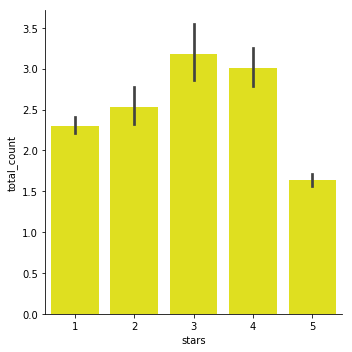

In [60]:
sb.catplot(x='stars',y='total_count',data=nlv_time,kind='bar',color='yellow')

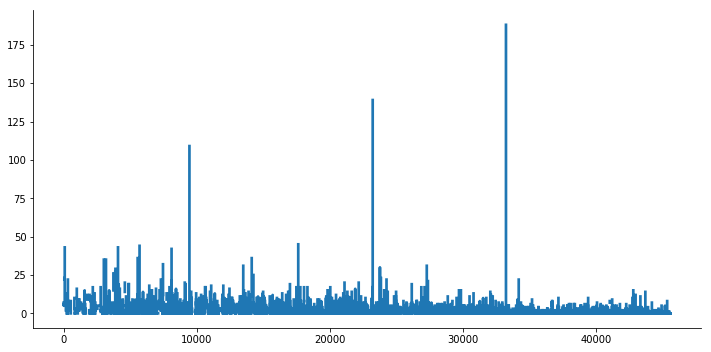

In [83]:
#g = sb.catplot(x='date',y='total_count',hue='stars',data=nlv_time,kind='point',aspect=2,dodge=True)

# Re-scale axes to log-scale to see differences
# axs = g.axes.flat
# for ax in axs:
#     ax.set_ylim((1e1,1e4))
#     ax.set_yscale('log')

In [ ]:
# Taking a very long time to run :( 
g = sb.catplot(x='date',y='total_count',data=nlv_time, kind='point',aspect=2,dodge=True)

Show top 10 rated reviews based on their "upvotes"
- Note that the top 10 rated reviews based on stars wouldn't be useful since they'd all just be 5 stars (?)

In [78]:
nlv_time.groupby('text')[['total_count', 'stars']].mean().sort_values(by='total_count', ascending=False).head(10)

total_count  stars
text                                                                  
Made my order and the friendly Cane'nette, gave...        251.0    4.0
Donut Mania has new co-owners and has now opene...        188.0    1.0
Thrive located in Las Vegas NV. \n \nThe Cheyen...        180.0    5.0
Popcorn Girl is a great addition to this part o...        175.0    5.0
I usually stop at CVS if I need a prescription ...        168.0    3.0
Thanks to fellow yelper, Daniel S., I found out...        165.0    3.0
I was excited to see this Capriotti's location ...        165.0    4.0
This location is in a strip mall and parking ca...        165.0    3.0
Tsp. Baking Co is a nice addition to our neighb...        165.0    4.0
I have been by Reef Dispensaries several times ...        163.0    3.0

In [80]:
nlv_time.groupby('text')[['total_count','stars']].mean().sort_values(by='stars', ascending=False).head(10)

,total_count,stars
text,,
朝7:00から営業してて、ドライブスルーもあります。\n日本語は通じませんが店員さんの感じは良いです。\n朝食のブリトーが美味しいです！サイズがかなり大きいです。\nオムレツもオススメです！,0.0,5.0
"The best sandwich shop for a chicken cheesesteak. It's my go to item every time I come here. They know what you mean when you say ""EXTRA"" cheese or peppers or mayonnaise etc. always friendly. \nI call to order usually because there is a wait for the hot sandwiches. About 10-15 minutes. But it's very worth it!!!!!",5.0,5.0
I love Popeyes! My favorite fried chicken chain. This Popeyes specifically can be suuuuuuuper busy especially on a Tuesday (great deal). \n\nI love to order their spicy chicken family size buckets with Cajun rice. Their blacken ranch sauce is delicious. Crispy and juicy! Always returning for more I often go here to bring some over to my parents place.. they really enjoy it as well.,49.0,5.0
The best sushi place for me by far in the northside. Hope you guys get to try this place out.,1.0,5.0
The best tacos ever!!!!! The lines to order are very confusing but all the food is bomb,2.0,5.0
I love Poke Express! Great service. They let you have samples of anything you'd like to try. It's not the cheapest but the quality of the fish & seafood is worth it. My favorite is the spicy ahi. I easily fork out the money to buy 1-2 lbs at a time. No rice or anything needed.,0.0,5.0
"I love Pizza, Ive had it all over Las Vegas and other cities. I've got to say, this is a legit pizza joint. Hands down, the best pizza in the city. Now I cant have pizza at any other place. Those chain pizza places are a joke now.",0.0,5.0
The best tacos in Vegas highly recommended you can't leave Vegas without eating here at tacos Tijuana,0.0,5.0
"The best tacos this side of the border, maybe the world. The first time I tried these legendary culinary delights was in Chula, Vista, CA and I was hooked! After longing for another mouth watering bite, I was ecstatic to find this Mecca in Vegas!\n\nThey use fresh meat, which is actually grilled the way it should be-over charcoal, and the salsas are tasty.\n\nYou can't go wrong with the carne asada tacos. I highly suggest the tacos al pastor and a mula with carne asada.",2.0,5.0


Show the worst 10 rated reviews based on the rating and upvotes 
- Note that the worst rated reviews based on stars is only semi-useful because we know they'll all be 1 star ratings, but also their "upvotes" won't be extremely useful because it's already a bad place-- but if it's considered cool, funny, or useful, could mean people were looking at them regardless to see just how bad a place is due to X. 

In [81]:
nlv_time.groupby('text')[['total_count','stars']].mean().sort_values(by='stars').head(10)

,total_count,stars
text,,
"Just walked in and they refused to serve me because they're ""real backed up right now."" 7:51PM May 2, 2015. How does a business allow that to happen? I was really looking forward to trying this place. There was no ""just wait for a few minutes"" or ""try back in a little while"" the cashier flat out told me they're not going to accept orders.",8.0,1.0
"Terrible dining experience on every level. Long story short, the service was beyond slow. We waited several minutes to be greeted once sat. Once the girl took our drink and food order at once, it took about 10 minutes to get water, and after asking two different servers for my wine, at least another 10 for that. \n\nWe were told 30 minutes for our dinner but waited about 45, and got over cooked seafood. The lobster was completely inedible, but since no one came back to check on us, we had to tell the receptionist to get a manager. The ""manager"" came over and said she could take the $4 off for the lobster, because it came with shrimp and the tiniest scallops ever. We just laughed and said thank you for that. Our server never did come back to the table, not even once after we got our food, and it's not that they were even that busy.\n\nI will say there was one, and only one, awesome employee. Props to the busser with the dark hair, half up in a ponytail. He was literally the only one who came to our our table to see how we were. Thank you for the one person with work ethic and a positive attitude. The other busser(blonde)walled right past us when we were standing at the door waiting for someone to greet us. \n\nHorrible service, less than mediocre food, and never returning back. Thanks for a stellar date night with my husband.",5.0,1.0
"Terrible customer service... From the MANAGER.\nI went in to this Old Navy to check out their clearance clothes and found some super cute black shorts marked 75% off at $5.99. I loved them so much I got a pair in beige and navy blue- both marked at the same price as the black ones. When I got to the register, the shorts didn't ring in as their clearance price, instead they were $22. I brought that to the cashier's attention and he called his manager over. The manager Meredith Moore told me that they had been marked wrong and that we wouldn't get that price for two of them, but the navy pair would be $2.97. So even though their clearance price was on the tag, they would not honor their price. I work in retail and when we put the wrong price on something and a customer brings it to the counter, we honor that price and take the tags off anything else of that same thing that's the same wrong price. Needless to say, I did not get the $22 shorts. Meredith's customer service was terrible and left me mad for hours. You may want to have an employee walk around with you everywhere and verify each price. Better yet, don't even go here. I will never recommend it to anyone. In fact I'll discourage it.",0.0,1.0
"Terrible customer service. When I first started eating here like a year ago it was great, then they started getting sloppy with their food and now they are just bad all over. A plate is no longer the same size as before, placed an order for pick up and they didn't began making it til I got there and paid, and I specifically asked for NO sesame seeds in my chow mein and the guy said ok but I get my chow mein and it has sesame seeds. Never going back again. Such a shame, it was so good before.",0.0,1.0
"I LOVE deltaco but this location is SO SLOW its ridiculous and then food is not even that great ,they need a new manager asap I have tried 3 different times thinking maybe its time of day ,crew any excuse but now I'm done its just crap all together.",1.0,1.0
"Terrible customer service. This auction is in need of a complete management overhaul. Possibly the worst run auto auction I have ever attended, and I have been doing this 33 years.",0.0,1.0
"Terrible customer service. They add to your price after services. The sign says $

In [82]:
nlv_time.groupby('text')[['total_count','stars']].mean().sort_values(by='total_count').head(10)

,total_count,stars
text,,
朝7:00から営業してて、ドライブスルーもあります。\n日本語は通じませんが店員さんの感じは良いです。\n朝食のブリトーが美味しいです！サイズがかなり大きいです。\nオムレツもオススメです！,0.0,5.0
Just ordered from new china cuisine and the food came fast and was fantastic! I would definitely recommend.,0.0,5.0
"Just ordered from here for the first time. From the east coast so I like a real good calzone. Ordered a buffalo chicken calzone and mozzarella sticks. The calzone was pretty good taste wise but was honestly the size of a quesadilla and maybe got three pieces of chicken. Three pieces of chicken being three little cubes of chicken. The delivery time was pretty good, but when my calzone got here I had to put it in the oven because it was still so doughy and undercooked. Gonna probably try it again because everything else out here sucks but that might be it.\n\n\nJust ordered from here again and I will absolutely never go back. It took an hour and a half to get my order that was wrong, soggy, and cold. All set.",0.0,1.0
"Just ordered from here for the first time. From the east coast so I like a real good calzone. Ordered a buffalo chicken calzone and mozzarella sticks. The calzone was pretty good taste wise but was honestly the size of a quesadilla and maybe got three pieces of chicken. Three pieces of chicken being three little cubes of chicken. The delivery time was pretty good, but when my calzone got here I had to put it in the oven because it was still so doughy and undercooked. Gonna probably try it again because everything else out here sucks but that might be it.",0.0,3.0
Just ordered food and after tasting a little bit of each item I threw it all away. Breading was soggy and undercooked. The veggie rice was bland. I figured I could end this non meal with a good fortune but it's the first time ever I was never given fortune cookies. Never again will I eat here. Inferior food and ingredients for spending $30.00 Blech!!,0.0,1.0
We have been using Pre Empt Pest Control for over 3 years now and have have been very pleased with the service. Never had an issue with any pests and if I notice seasonal bugs they always do an extra indoor spray. Would recommend to my family and friends.,0.0,5.0
Just opened up and it's the same as all Roberto's... Since I am closer to this area it comes in handy when you don't have to drive far for a craving.... Like all Roberto's its open 24hrs.,0.0,4.0
"We have been using Ship My Orders (SMO) for our fulfillment service for our West coast orders since early 2009.\n\n Our West coast fulfillment service *prior to SMO*, messed up orders (eg sent orders out ground instead of expedited- when they were needed by a customer for a job), overcharged us, did not provide 'detail' on their invoices to us, and were going to overcharge us on 'storage' if we didn't move to a new fulfillment center. Additionally, it was difficult to know what we had in inventory at any one time.\n\n Since we have been with SMO (David and Diana and their staff) - our West coast shipping is pretty much *'lights out'* for us, as we have both our shopping cart and our Amazon store orders automated to directly feed into SMO. SMO opened an East coast warehouse in Sept 2014, and we moved our inventory from our 'east coast' warehouse, another Nashville TN warehouse we used at the time, that was no where as efficient, cost effective or automated as SMO was.\n\n We have had a total of 5 fulfillment centers since we started business in 2006. Our current 2 fulfillment centers are both owned and operated by SMO in Las Vegas, NV (since 2009) and in Nashville, TN (since 2014).\n\nSMO far exceeds my expectations in all ways.\n\n Support:\n\n 1) online access to all orders, current and shipped (that I can enter online, or automatically send through a datafeed)\n 2) online access to current inventory, by distribution center (Las Vegas or Nashville)\n 3) I get my tracking numbers nightly - as well as have online access to them.\n 4) Our shopping cart customers automatically get emailed their tracking number

### Mini time-series analysis attempt

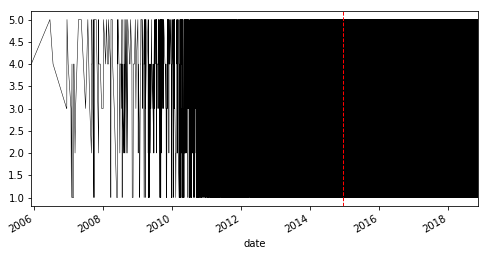

In [46]:
# Set up the plotting environment
f,ax = plt.subplots(1,1,figsize=(8,4))

# Put the "date" column as an index, access the remaining "passengers" column, and plot on the ax defined above
nlv_time.set_index('date')['stars'].plot(c='k',lw=0.5,ax=ax) #lw = linewidth 

# Make a vertical red line on December 18, 2014, the date when Yelp launched their mobile app 
ax.axvline(pd.Timestamp('2014-12-18'),color='r',ls='--',lw=1)